# LSTM Model with the error correctness and with Green data (Xout)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
from keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
# loading the data
df = pd.read_excel("103_upset (around 21000 points).xls", header= 3)
df.head(6)

,Time,,Flow,Flow.1,Flow.2,Flow.3,Flow.4,Flow.5,Press,Press.1,...,Press.4,Press.5,Press.6,Press.7,Temp,Temp.1,Temp.2,Temp.3,Temp.4,oxygen
0,NaN,NaN,BFW,BFW,Steam,Steam,Fuel gas,Air,FD disch,Fuel gas,...,ignitor,steam drm,steam drm,flue gas,Dertor,steam drm,super,super,flue gas,%
1,NaN,,92fi300.pv,92fy300.pv,92fi301.pv,92fi301.pv,92fi305.pv,92fi302.pv,92pi317.pv,92pi311.pv,...,92pi324.pv,92pi307.pv,92pi301.pv,92pi300.pv,93ti211.pv,92ti300a.pv,92ti300b.pv,92ti311.pv,92ti300.pv,92ai300.pv
2,NaN,2008-06-21 07:00:00,355.848491,355.234993,352.095325,352.095325,401.596232,1.12351,9.716322,7.576174,...,7.780427,628.271028,649.402659,0.310961,298.276672,597.732324,760.399808,765.36439,335.989723,2.05269
3,NaN,2008-06-21 07:00:01,355.877026,355.345775,354.608066,354.608066,401.471854,1.111719,9.716363,7.576189,...,7.780427,628.270974,649.402513,0.310964,298.276689,597.732295,760.399987,765.36489,335.989571,2.030534
4,NaN,2008-06-21 07:00:02,355.90556,355.456557,356.111179,356.111179,401.347476,1.099927,9.716405,7.576205,...,7.780427,628.270921,649.402367,0.310968,298.276707,597.732267,760.400165,765.36539,335.989419,2.018448
5,NaN,2008-06-21 07:00:03,355.934095,355.567339,356.604663,356.604663,401.223098,1.088136,9.716447,7.57622,...,7.780428,628.270868,649.402221,0.310972,298.276724,597.732239,760.400343,765.36589,335.989267,2.016434


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     0 non-null      float64
 1            21601 non-null  object 
 2   Flow     21602 non-null  object 
 3   Flow.1   21602 non-null  object 
 4   Flow.2   21602 non-null  object 
 5   Flow.3   21602 non-null  object 
 6   Flow.4   21602 non-null  object 
 7   Flow.5   21602 non-null  object 
 8   Press    21602 non-null  object 
 9   Press.1  21602 non-null  object 
 10  Press.2  21602 non-null  object 
 11  Press.3  21602 non-null  object 
 12  Press.4  21602 non-null  object 
 13  Press.5  21602 non-null  object 
 14  Press.6  21602 non-null  object 
 15  Press.7  21602 non-null  object 
 16  Temp     21602 non-null  object 
 17  Temp.1   21602 non-null  object 
 18  Temp.2   21602 non-null  object 
 19  Temp.3   21602 non-null  object 
 20  Temp.4   21602 non-null  object 
 21  oxygen   216

# Preprocessing

In [4]:
#Droping First colmun and First two rows
df=df.drop([0,1], axis=0)
df = df.drop(df.iloc[:,0:1],axis = 1)

In [5]:
df.head()

,,Flow,Flow.1,Flow.2,Flow.3,Flow.4,Flow.5,Press,Press.1,Press.2,...,Press.4,Press.5,Press.6,Press.7,Temp,Temp.1,Temp.2,Temp.3,Temp.4,oxygen
2,2008-06-21 07:00:00,355.848491,355.234993,352.095325,352.095325,401.596232,1.12351,9.716322,7.576174,0.008244,...,7.780427,628.271028,649.402659,0.310961,298.276672,597.732324,760.399808,765.36439,335.989723,2.05269
3,2008-06-21 07:00:01,355.877026,355.345775,354.608066,354.608066,401.471854,1.111719,9.716363,7.576189,0.008244,...,7.780427,628.270974,649.402513,0.310964,298.276689,597.732295,760.399987,765.36489,335.989571,2.030534
4,2008-06-21 07:00:02,355.90556,355.456557,356.111179,356.111179,401.347476,1.099927,9.716405,7.576205,0.008245,...,7.780427,628.270921,649.402367,0.310968,298.276707,597.732267,760.400165,765.36539,335.989419,2.018448
5,2008-06-21 07:00:03,355.934095,355.567339,356.604663,356.604663,401.223098,1.088136,9.716447,7.57622,0.008245,...,7.780428,628.270868,649.402221,0.310972,298.276724,597.732239,760.400343,765.36589,335.989267,2.016434
6,2008-06-21 07:00:04,355.96263,355.678121,355.491806,355.491806,401.09872,1.083197,9.716489,7.576236,0.008246,...,7.780428,628.270815,649.402075,0.310976,298.276742,597.73221,760.400521,765.366391,335.989115,2.01442


In [6]:
colWithTime=['Time','Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df.columns = colWithTime
col=['Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df[col] = df[col].apply(pd.to_numeric, errors= 'coerce', downcast= 'float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 2 to 21601
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        21600 non-null  object 
 1   Flow BFW/ 92fi300.pv        21510 non-null  float32
 2   Flow BFW/92fy300.pv         21582 non-null  float32
 3   Flow Steam/92fi301.pv       21582 non-null  float32
 4   Flow Steam/92fi301.pv.1     21582 non-null  float32
 5   Flow Fuel gas/92fi305.pv    21582 non-null  float32
 6   Flow Air/92fi302.pv         21582 non-null  float32
 7   Press FD disch/92pi317.pv   21582 non-null  float32
 8   Press Fuel gas/92pi311.pv   21582 non-null  float32
 9   Press Fuel gas/92pi304.pv   21582 non-null  float32
 10  Press furnce/92pi306.pv     21582 non-null  float32
 11  Press ignitor /92pi324.pv   21582 non-null  float32
 12  Press steam drm/92pi307.pv  21582 non-null  float32
 13  Press steam drm/92pi301.pv  215

In [7]:
# filling the null values of Press flue gas/92pi300.pv by the mean value
df['Press flue gas/92pi300.pv']= df['Press flue gas/92pi300.pv'].fillna(df['Press flue gas/92pi300.pv'].mean())
df['Press flue gas/92pi300.pv'].describe()

count    21600.000000
mean         0.335788
std          0.032409
min          0.276383
25%          0.308812
50%          0.335786
75%          0.361206
max          0.418377
Name: Press flue gas/92pi300.pv, dtype: float64

In [8]:
df['Time']= df['Time'].apply(pd.to_datetime ,errors= 'coerce' )

# dropping features marked us not needed for the model (Black)
df = df.drop("Flow BFW/92fy300.pv",axis = 1)
df = df.drop("Flow Steam/92fi301.pv",axis = 1)
df = df.drop("Temp super/92ti311.pv",axis = 1)

In [9]:
# use this cell to drop the state data
# colToBeDropped = ['Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv','Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv']
# df = df.drop(colToBeDropped,axis = 1)

In [10]:
display(df)

,Time,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv.1,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv,Press FD disch/92pi317.pv,Press Fuel gas/92pi311.pv,Press Fuel gas/92pi304.pv,Press furnce/92pi306.pv,Press ignitor /92pi324.pv,Press steam drm/92pi307.pv,Press steam drm/92pi301.pv,Press flue gas/92pi300.pv,Temp Dertor /93ti211.pv,Temp steam drm/92ti300a.pv,Temp super/92ti300b.pv,Temp flue gas/92ti300.pv,oxygen% /92ai300.pv
2,2008-06-21 07:00:00,355.848480,352.095337,401.596222,1.123510,9.716322,7.576174,0.008244,3.716083,7.780427,628.271057,649.402649,0.310961,298.276672,597.732300,760.399780,335.989716,2.052690
3,2008-06-21 07:00:01,355.877014,354.608063,401.471863,1.111719,9.716364,7.576190,0.008244,3.716082,7.780427,628.270996,649.402527,0.310964,298.276703,597.732300,760.399963,335.989563,2.030534
4,2008-06-21 07:00:02,355.905548,356.111176,401.347473,1.099927,9.716405,7.576205,0.008245,3.716082,7.780427,628.270935,649.402344,0.310968,298.276703,597.732239,760.400146,335.989410,2.018448
5,2008-06-21 07:00:03,355.934082,356.604675,401.223083,1.088136,9.716447,7.576221,0.008245,3.716082,7.780428,628.270874,649.402222,0.310972,298.276733,597.732239,760.400330,335.989258,2.016434
6,2008-06-21 07:00:04,355.962616,355.491791,401.098724,1.083197,9.716489,7.576236,0.008246,3.716081,7.780428,628.270813,649.402100,0.310976,298.276733,597.732239,760.400513,335.989105,2.014420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,2008-06-21 12:59:55,355.894012,355.310516,384.652435,1.079072,9.662274,6.908769,0.050951,3.449764,7.674482,633.258545,657.526001,0.317213,299.992676,605.804993,768.476746,355.115173,1.953448
21598,2008-06-21 12:59:56,355.618317,354.761658,384.477875,1.083946,9.661740,6.908767,0.050951,3.449861,7.674482,633.258057,657.524597,0.319882,299.992676,605.795837,768.476196,355.113800,1.955882
21599,2008-06-21 12:59:57,355.342621,356.987366,383.877808,1.085681,9.661206,6.908764,0.050951,3.449958,7.674482,633.257568,657.523254,0.322551,299.992676,605.786682,768.475586,355.112396,1.958315
21600,2008-06-21 12:59:58,355.066925,356.524109,384.063263,1.087415,9.660672,6.908762,0.050951,3.450054,7.674482,633.257141,657.521851,0.325220,299.992676,605.777588,768.475037,355.111023,1.960749


In [11]:
df = df.dropna()

In [12]:
df.index = df.pop('Time')
df.head()

,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv.1,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv,Press FD disch/92pi317.pv,Press Fuel gas/92pi311.pv,Press Fuel gas/92pi304.pv,Press furnce/92pi306.pv,Press ignitor /92pi324.pv,Press steam drm/92pi307.pv,Press steam drm/92pi301.pv,Press flue gas/92pi300.pv,Temp Dertor /93ti211.pv,Temp steam drm/92ti300a.pv,Temp super/92ti300b.pv,Temp flue gas/92ti300.pv,oxygen% /92ai300.pv
Time,,,,,,,,,,,,,,,,,
2008-06-21 07:00:00,355.848480,352.095337,401.596222,1.123510,9.716322,7.576174,0.008244,3.716083,7.780427,628.271057,649.402649,0.310961,298.276672,597.732300,760.399780,335.989716,2.052690
2008-06-21 07:00:01,355.877014,354.608063,401.471863,1.111719,9.716364,7.576190,0.008244,3.716082,7.780427,628.270996,649.402527,0.310964,298.276703,597.732300,760.399963,335.989563,2.030534
2008-06-21 07:00:02,355.905548,356.111176,401.347473,1.099927,9.716405,7.576205,0.008245,3.716082,7.780427,628.270935,649.402344,0.310968,298.276703,597.732239,760.400146,335.989410,2.018448
2008-06-21 07:00:03,355.934082,356.604675,401.223083,1.088136,9.716447,7.576221,0.008245,3.716082,7.780428,628.270874,649.402222,0.310972,298.276733,597.732239,760.400330,335.989258,2.016434
2008-06-21 07:00:04,355.962616,355.491791,401.098724,1.083197,9.716489,7.576236,0.008246,3.716081,7.780428,628.270813,649.402100,0.310976,298.276733,597.732239,760.400513,335.989105,2.014420


# LSTM data preperation

In [13]:
PFG = df.drop(["Press Fuel gas/92pi304.pv","Press flue gas/92pi300.pv","Temp flue gas/92ti300.pv","oxygen% /92ai300.pv"],axis=1)
display(PFG.shape)
display(PFG.head())

(21494, 13)

,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv.1,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv,Press FD disch/92pi317.pv,Press Fuel gas/92pi311.pv,Press furnce/92pi306.pv,Press ignitor /92pi324.pv,Press steam drm/92pi307.pv,Press steam drm/92pi301.pv,Temp Dertor /93ti211.pv,Temp steam drm/92ti300a.pv,Temp super/92ti300b.pv
Time,,,,,,,,,,,,,
2008-06-21 07:00:00,355.848480,352.095337,401.596222,1.123510,9.716322,7.576174,3.716083,7.780427,628.271057,649.402649,298.276672,597.732300,760.399780
2008-06-21 07:00:01,355.877014,354.608063,401.471863,1.111719,9.716364,7.576190,3.716082,7.780427,628.270996,649.402527,298.276703,597.732300,760.399963
2008-06-21 07:00:02,355.905548,356.111176,401.347473,1.099927,9.716405,7.576205,3.716082,7.780427,628.270935,649.402344,298.276703,597.732239,760.400146
2008-06-21 07:00:03,355.934082,356.604675,401.223083,1.088136,9.716447,7.576221,3.716082,7.780428,628.270874,649.402222,298.276733,597.732239,760.400330
2008-06-21 07:00:04,355.962616,355.491791,401.098724,1.083197,9.716489,7.576236,3.716081,7.780428,628.270813,649.402100,298.276733,597.732239,760.400513


In [14]:
# defining the output columns
ypf1= df[['Press Fuel gas/92pi304.pv']]
ypf1= ypf1.to_numpy()
ypf1= ypf1.reshape(-1,1)

ypf2= df[['Press flue gas/92pi300.pv']]
ypf2= ypf2.to_numpy()
ypf2= ypf2.reshape(-1,1)

ypf3= df[['Temp flue gas/92ti300.pv']]
ypf3= ypf3.to_numpy()
ypf3= ypf3.reshape(-1,1)

ypf4= df[['oxygen% /92ai300.pv']]
ypf4= ypf4.to_numpy()
ypf4= ypf4.reshape(-1,1)

In [15]:
# from sklearn.preprocessing import StandardScaler


s1 =StandardScaler()
s2 =StandardScaler()
s3 =StandardScaler()
s4 =StandardScaler()
s5 =StandardScaler()

s1= s1.fit(ypf1)
s2= s2.fit(ypf2)
s3= s3.fit(ypf3)
s4= s4.fit(ypf4)
s5= s5.fit(PFG)

ypf1=s1.transform(ypf1)
ypf2=s2.transform(ypf2) 
ypf3=s3.transform(ypf3) 
ypf4=s4.transform(ypf4) 
PFG= s5.transform(PFG)

PFG = pd.DataFrame(PFG)
PFG['13'] = ypf1
PFG['14'] = ypf2
PFG['15'] = ypf3
PFG['16'] = ypf4
display(PFG)
PFG= PFG.to_numpy()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.881462,-0.999050,-0.776282,-0.779350,-0.764965,-0.809909,-0.771072,1.217451,-0.358230,-0.905880,-0.047448,-0.973408,-1.390833,-1.715528,-0.763037,-1.427794,0.351525
1,-0.880833,-0.943088,-0.779142,-0.815262,-0.764946,-0.809900,-0.771072,1.217451,-0.358241,-0.905895,-0.047423,-0.973408,-1.390778,-1.715492,-0.762918,-1.427811,0.215631
2,-0.880204,-0.909611,-0.782002,-0.851174,-0.764926,-0.809891,-0.771073,1.217464,-0.358253,-0.905917,-0.047423,-0.973411,-1.390723,-1.715456,-0.762797,-1.427827,0.141507
3,-0.879576,-0.898620,-0.784863,-0.887086,-0.764907,-0.809881,-0.771073,1.217476,-0.358265,-0.905932,-0.047398,-0.973411,-1.390667,-1.715421,-0.762678,-1.427844,0.129153
4,-0.878947,-0.923406,-0.787723,-0.902129,-0.764887,-0.809872,-0.771073,1.217476,-0.358276,-0.905946,-0.047398,-0.973411,-1.390612,-1.715385,-0.762558,-1.427860,0.116800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,-0.880459,-0.927443,-1.165967,-0.914692,-0.790225,-1.214776,-0.963373,-1.573244,0.586716,0.075055,1.360455,-0.539765,1.054487,1.660586,-0.569010,0.636192,-0.257164
21490,-0.886533,-0.939667,-1.169982,-0.899845,-0.790475,-1.214778,-0.963303,-1.573244,0.586623,0.074886,1.360455,-0.540257,1.054321,1.660586,-0.486193,0.636044,-0.242236
21491,-0.892608,-0.890097,-1.183783,-0.894563,-0.790725,-1.214779,-0.963234,-1.573244,0.586531,0.074724,1.360455,-0.540749,1.054136,1.660586,-0.403374,0.635892,-0.227309
21492,-0.898682,-0.900414,-1.179517,-0.889280,-0.790974,-1.214781,-0.963164,-1.573244,0.586450,0.074554,1.360455,-0.541238,1.053970,1.660586,-0.320556,0.635744,-0.212381


In [16]:
X = []
y = []

num_of_future_sec = 1
num_of_past_sec = 5

for i in range(num_of_past_sec, len(PFG) - num_of_future_sec + 1):
    X.append(PFG[i - num_of_past_sec:i,0:PFG.shape[1]])
    y.append(PFG[i + num_of_future_sec - 1:i + num_of_future_sec,13:17])

In [17]:
X, y =np.array(X), np.array(y)
y = y.reshape(-1,4)
X = X[:,:,0:13]
X.shape , y.shape

((21489, 5, 13), (21489, 4))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Model data preperation


In [19]:
display(X_train.shape)
display(y_train.shape)

(13752, 5, 13)

(13752, 4)

# Modeling

In [20]:
model1 = Sequential()
model1.add(LSTM(128,input_shape = (X_train.shape[1], X_train.shape[2]),activation = 'relu'))
model1.add(Dense(64, 'relu'))
model1.add(Dense(32, 'relu'))
model1.add(Dense(y_train.shape[1],activation = 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               72704     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,172
Trainable params: 83,172
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [22]:
# display(X_train.shape)
# display(y_train.shape[2])
# display(X_val.shape)
# display(y_val.shape)

In [23]:
history = model1.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
430/430 [==============================] - 9s 11ms/step - loss: 0.4488 - root_mean_squared_error: 0.6700 - val_loss: 0.2463 - val_root_mean_squared_error: 0.4962
Epoch 2/100
430/430 [==============================] - 4s 9ms/step - loss: 0.1708 - root_mean_squared_error: 0.4133 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3597
Epoch 3/100
430/430 [==============================] - 4s 9ms/step - loss: 0.1111 - root_mean_squared_error: 0.3333 - val_loss: 0.1020 - val_root_mean_squared_error: 0.3194
Epoch 4/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0935 - root_mean_squared_error: 0.3058 - val_loss: 0.0927 - val_root_mean_squared_error: 0.3044
Epoch 5/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0838 - root_mean_squared_error: 0.2895 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2836
Epoch 6/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0759 - root_mean_squared_error: 0.2754 - val_loss: 0.0744

Epoch 48/100
430/430 [==============================] - 8s 18ms/step - loss: 0.0386 - root_mean_squared_error: 0.1965 - val_loss: 0.0412 - val_root_mean_squared_error: 0.2029
Epoch 49/100
430/430 [==============================] - 8s 18ms/step - loss: 0.0382 - root_mean_squared_error: 0.1954 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1996
Epoch 50/100
430/430 [==============================] - 8s 18ms/step - loss: 0.0381 - root_mean_squared_error: 0.1952 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936
Epoch 51/100
430/430 [==============================] - 8s 18ms/step - loss: 0.0383 - root_mean_squared_error: 0.1957 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1949
Epoch 52/100
430/430 [==============================] - 8s 19ms/step - loss: 0.0374 - root_mean_squared_error: 0.1935 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1951
Epoch 53/100
430/430 [==============================] - 10s 24ms/step - loss: 0.0374 - root_mean_squared_error: 0.1933 - val_

Epoch 95/100
430/430 [==============================] - 4s 10ms/step - loss: 0.0309 - root_mean_squared_error: 0.1759 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1717
Epoch 96/100
430/430 [==============================] - 4s 9ms/step - loss: 0.0307 - root_mean_squared_error: 0.1752 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1717
Epoch 97/100
430/430 [==============================] - 4s 10ms/step - loss: 0.0304 - root_mean_squared_error: 0.1742 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1751
Epoch 98/100
430/430 [==============================] - 4s 10ms/step - loss: 0.0302 - root_mean_squared_error: 0.1739 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1745
Epoch 99/100
430/430 [==============================] - 4s 10ms/step - loss: 0.0299 - root_mean_squared_error: 0.1728 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 100/100
430/430 [==============================] - 4s 10ms/step - loss: 0.0297 - root_mean_squared_error: 0.1723 - val_l

# MSE plot

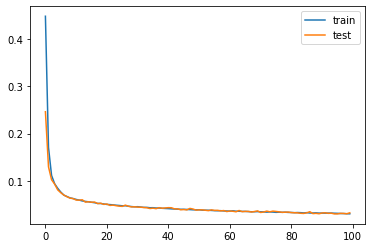

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# RMSE plot

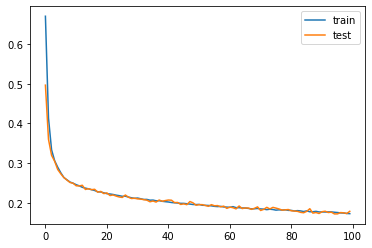

In [25]:
plt.plot(history.history['root_mean_squared_error'], label='train')
plt.plot(history.history['val_root_mean_squared_error'], label='test')
plt.legend()
plt.show()

# Results of the model without timesteps

In [26]:
test_predictions = model1.predict(X_test)

135/135 [==============================] - 1s 5ms/step


In [27]:
test_predictions.shape

(4298, 4)

In [28]:
display(test_predictions)

array([[ 0.67276865,  0.7352891 ,  1.6625978 ,  1.1366299 ],
       [ 0.61275864,  1.5935394 ,  0.72109646, -1.6108366 ],
       [ 1.4096437 ,  0.23410407,  1.398775  , -0.42687705],
       ...,
       [-1.6287277 , -0.78885   , -1.437093  , -0.32037914],
       [ 0.6304537 ,  0.25573584,  1.2739273 ,  0.19246331],
       [-0.2552656 , -1.6219406 , -0.8278662 ,  0.20774943]],
      dtype=float32)

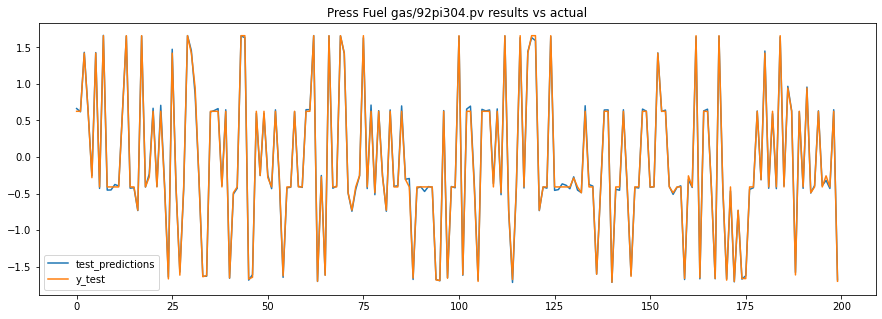

In [29]:
plt.figure(figsize=(15,5))
plt.title("Press Fuel gas/92pi304.pv results vs actual")
plt.plot(test_predictions[:200,0])
plt.plot(y_test[:200,0])
plt.legend(["test_predictions","y_test"])
plt.show()

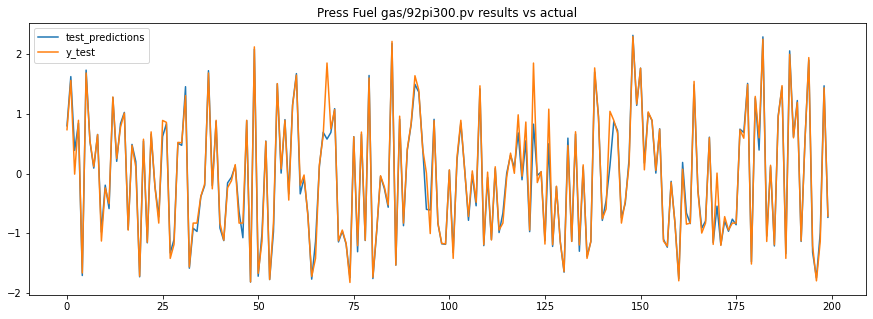

In [30]:
plt.figure(figsize=(15,5))
plt.title("Press Fuel gas/92pi300.pv results vs actual")
plt.plot(test_predictions[:200,1])
plt.plot(y_test[:200,1])
plt.legend(["test_predictions","y_test"])
plt.show()

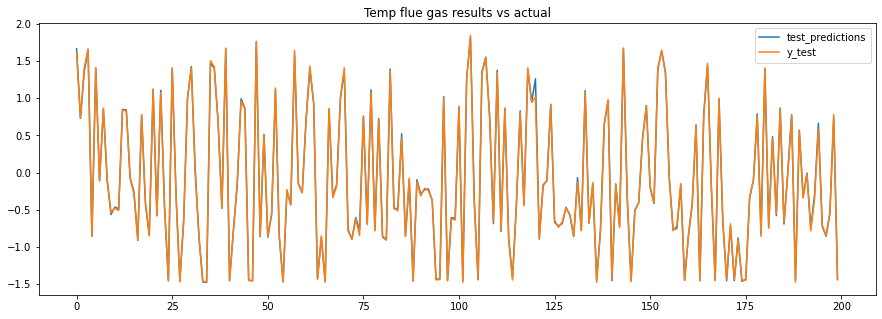

In [31]:
plt.figure(figsize=(15,5))
plt.title("Temp flue gas results vs actual")
plt.plot(test_predictions[:200,2])
plt.plot(y_test[:200,2])
plt.legend(["test_predictions","y_test"])
plt.show()

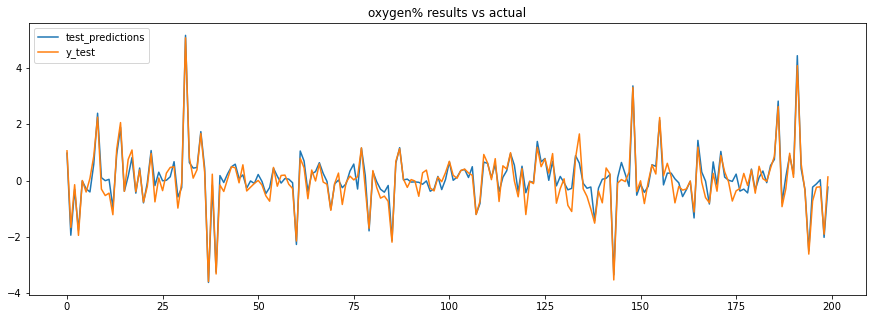

In [32]:
plt.figure(figsize=(15,5))
plt.title("oxygen% results vs actual")
plt.plot(test_predictions[:200,3])
plt.plot(y_test[:200,3])
plt.legend(["test_predictions","y_test"])
plt.show()

In [33]:
# help(plt.legend)

In [29]:
display(y_test.shape)
display(test_predictions.shape)

(4298, 4)

(4298, 4)

In [30]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
def maxMape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.max(np.abs((y_test - pred) / y_test))
    return mape

In [31]:
print(F"The MAPE value of Press Fuel gas/92pi304 {mape(y_test[:,0],test_predictions[:,0])}")
print(F"The MAPE value of Press Fuel gas/92pi300 {mape(y_test[:,1],test_predictions[:,1])}")
print(F"The MAPE value of Temp flue gas {mape(y_test[:,2],test_predictions[:,2])}")
print(F"The MAPE value of oxygen% {mape(y_test[:,3],test_predictions[:,3])}")

The MAPE value of Press Fuel gas/92pi304 0.03407248482108116
The MAPE value of Press Fuel gas/92pi300 1.3586689233779907
The MAPE value of Temp flue gas 0.059395719319581985
The MAPE value of oxygen% 2.4808692932128906


In [32]:
from sklearn.metrics import mean_squared_error as MSE
print(F"The RMSE value of Press Fuel gas/92pi304 {np.sqrt(MSE(y_test[:,0],test_predictions[:,0]))}")
print(F"The RMSE value of Press Fuel gas/92pi300 {np.sqrt(MSE(y_test[:,1],test_predictions[:,1]))}")
print(F"The RMSE value of Temp flue gas {np.sqrt(MSE(y_test[:,2],test_predictions[:,2]))}")
print(F"The RMSE value of oxygen% {np.sqrt(MSE(y_test[:,3],test_predictions[:,3]))}")

The RMSE value of Press Fuel gas/92pi304 0.027182213962078094
The RMSE value of Press Fuel gas/92pi300 0.1600734293460846
The RMSE value of Temp flue gas 0.0286463163793087
The RMSE value of oxygen% 0.3273770809173584


In [34]:
print(F"The Max MAPE value of Press Fuel gas/92pi304 {maxMape(y_test[:,0],test_predictions[:,0])}")
print(F"The Max MAPE value of Press Fuel gas/92pi300 {maxMape(y_test[:,1],test_predictions[:,1])}")
print(F"The Max MAPE value of Temp flue gas {maxMape(y_test[:,2],test_predictions[:,2])}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test[:,3],test_predictions[:,3])}")

The Max MAPE value of Press Fuel gas/92pi304 1.1065748929977417
The Max MAPE value of Press Fuel gas/92pi300 176.91355895996094
The Max MAPE value of Temp flue gas 7.686622142791748
The Max MAPE value of oxygen% 1804.162109375
